<a href="https://colab.research.google.com/github/Ishakasar/News-popularity-in-multiple-social-media-platforms/blob/main/News_popularity_prediction_in_social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


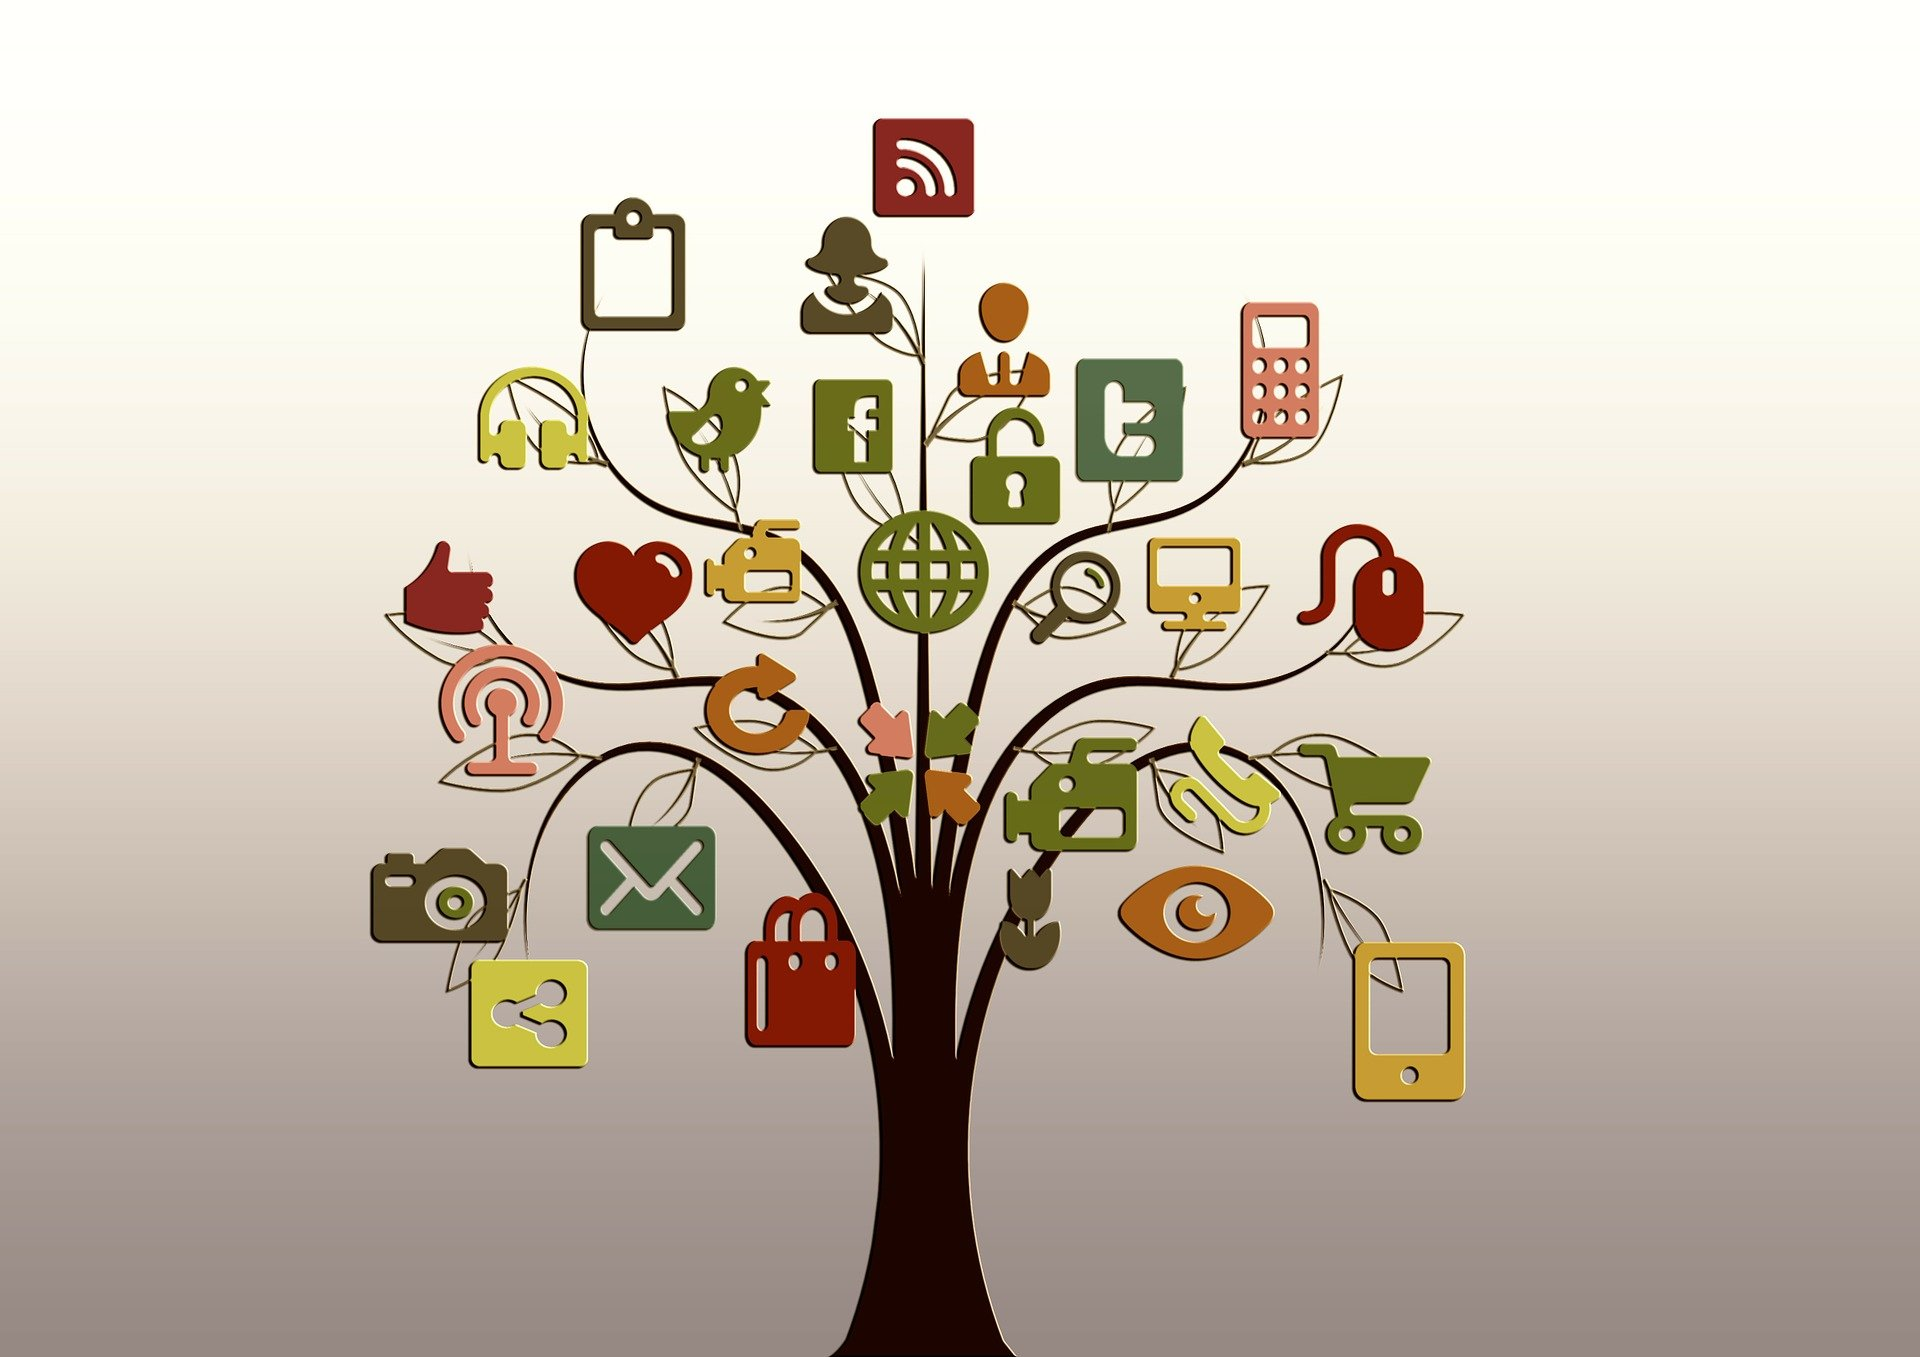

# **Importing Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
from spacy.lang.en import English
from sklearn.model_selection import GridSearchCV
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading Data**

In [ ]:
news_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Aravali/Module 4/Capstone-3 /Copy of News_Final.csv")

In [ ]:
news_df.shape

(93239, 11)

In [ ]:
news_df.head()

IDLink  ... LinkedIn
0  99248.0  ...       -1
1  10423.0  ...       -1
2  18828.0  ...       -1
3  27788.0  ...       -1
4  27789.0  ...       -1

[5 rows x 11 columns]

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn




**Some Basic Operation**

In [ ]:
news_df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

We have some column which contain Nan value We should remove them for better prediction.

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [ ]:
news_df.describe()

IDLink  SentimentTitle  ...    GooglePlus      LinkedIn
count   93239.000000    93239.000000  ...  93239.000000  93239.000000
mean    51560.653257       -0.005411  ...      3.888362     16.547957
std     30391.078704        0.136431  ...     18.492648    154.459048
min         1.000000       -0.950694  ...     -1.000000     -1.000000
25%     24301.500000       -0.079057  ...      0.000000      0.000000
50%     52275.000000        0.000000  ...      0.000000      0.000000
75%     76585.500000        0.064255  ...      2.000000      4.000000
max    104802.000000        0.962354  ...   1267.000000  20341.000000

[8 rows x 6 columns]

Dropping Rows Which contain **Nan** Value

In [ ]:
news_df.dropna(inplace=True,axis=0)

# **EDA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


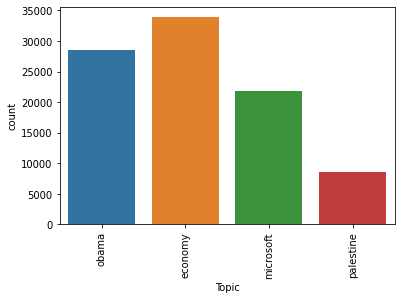

In [ ]:
sns.countplot(news_df['Topic'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (15,10)

We have most news on economy follwed by that obama.

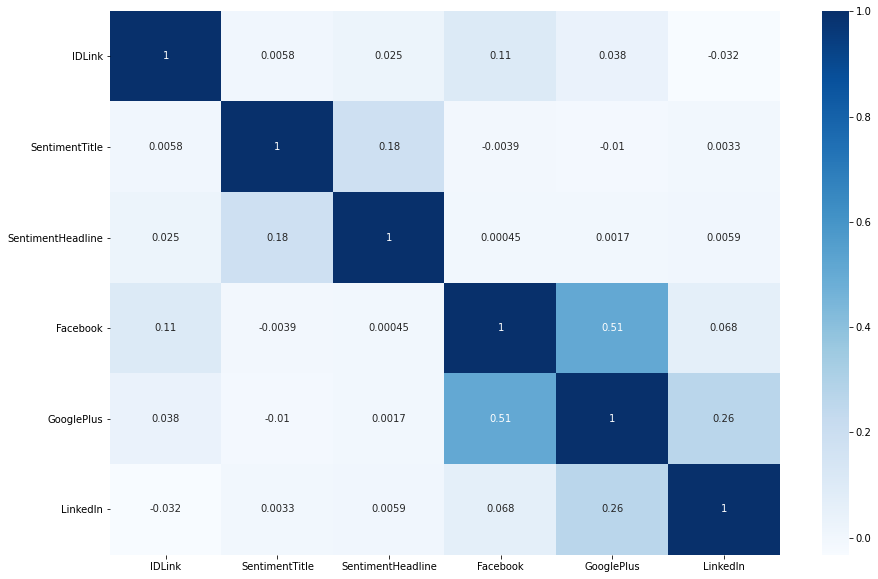

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=news_df.corr(),cmap='Blues',annot=True)

SentimentTitle and sentimentHeadline are not tightly coreleated which mean we could add them both for our regression task.

Here no column coreleated to each other which means we have nothing to worrey about multi colinearity.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


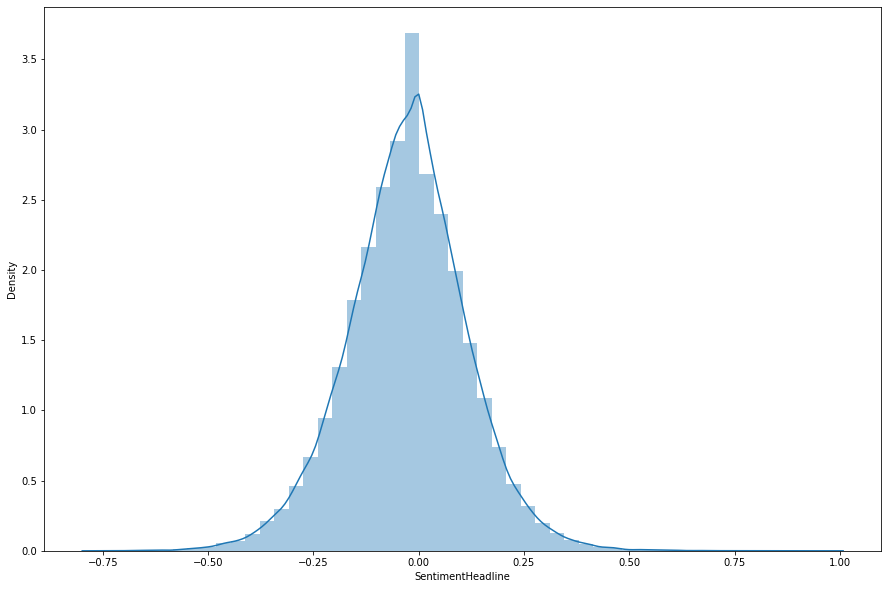

In [ ]:
sns.distplot(news_df['SentimentHeadline'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


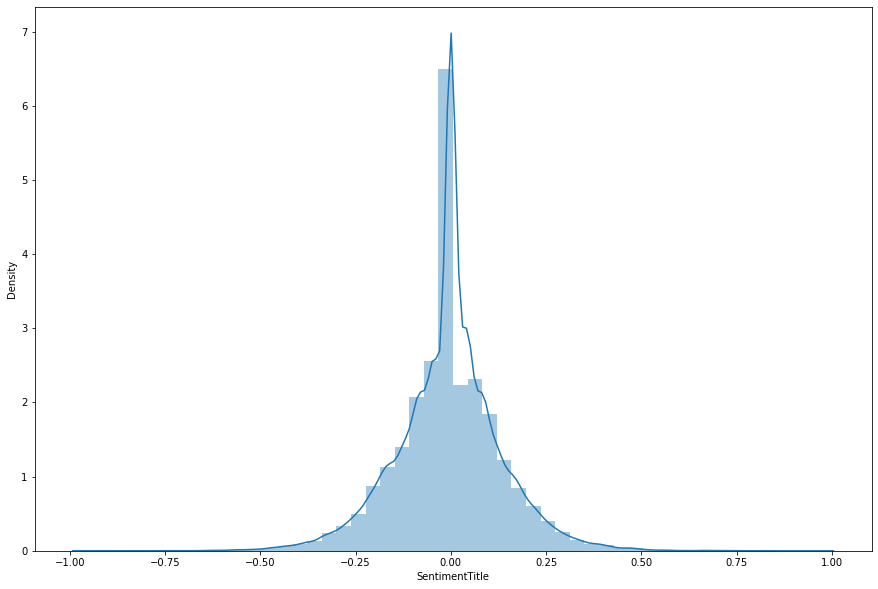

In [ ]:
sns.distplot(news_df['SentimentTitle'])

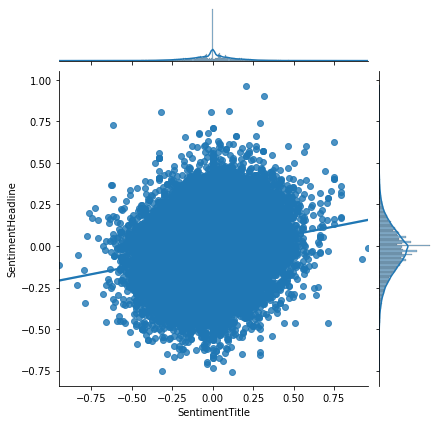

In [ ]:
sns.jointplot(x='SentimentTitle',y='SentimentHeadline',data=news_df,kind = 'reg')
plt.show()

We could see distribution of our two important numeric data As we can see sentiment headline follow normal distribution.

And our data spread is not follwing hetroscadasticity which is a good news.

In [ ]:
# combine to column for better implimentation on Vectorizer
news_df['Text']=news_df['Title']+news_df['Headline']

**WordCloud based on Topic(Obama)**

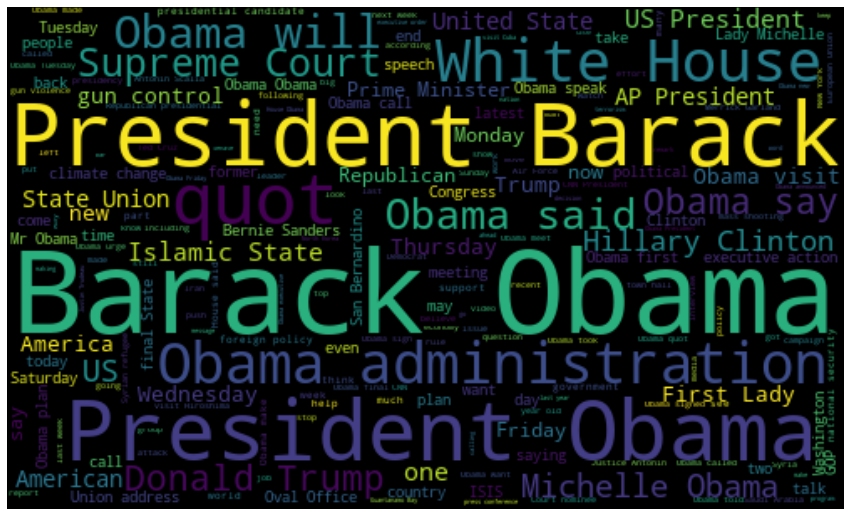

In [ ]:
# Word Contain on Obama News
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['Topic']=='obama']['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Topic(Economy)**

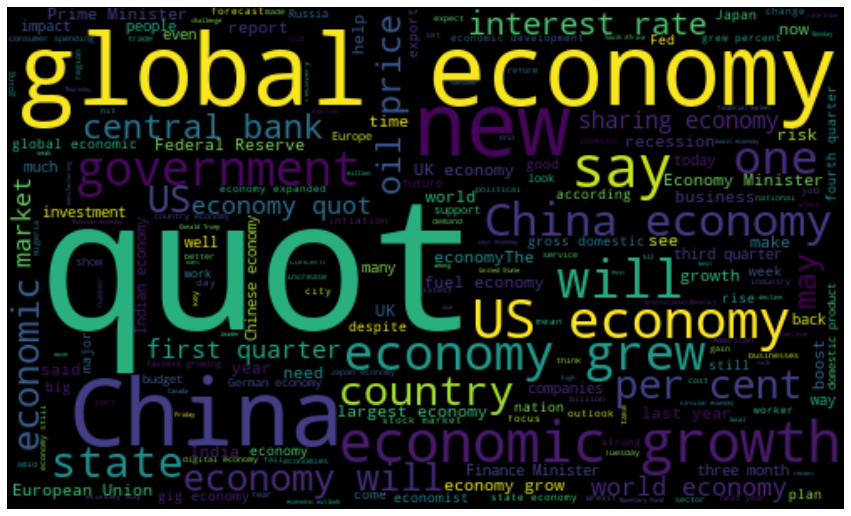

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['Topic']=='economy']['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Topic(Microsoft)**

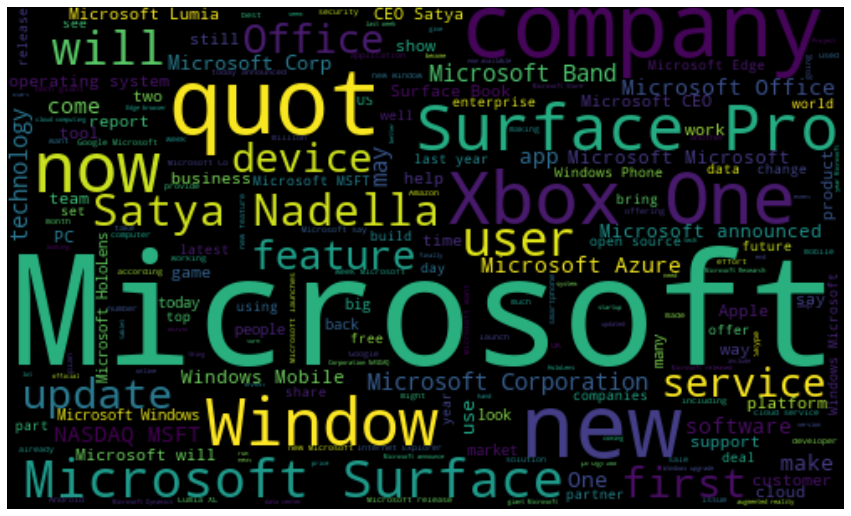

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['Topic']=='microsoft']['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Topic(Palestine)**

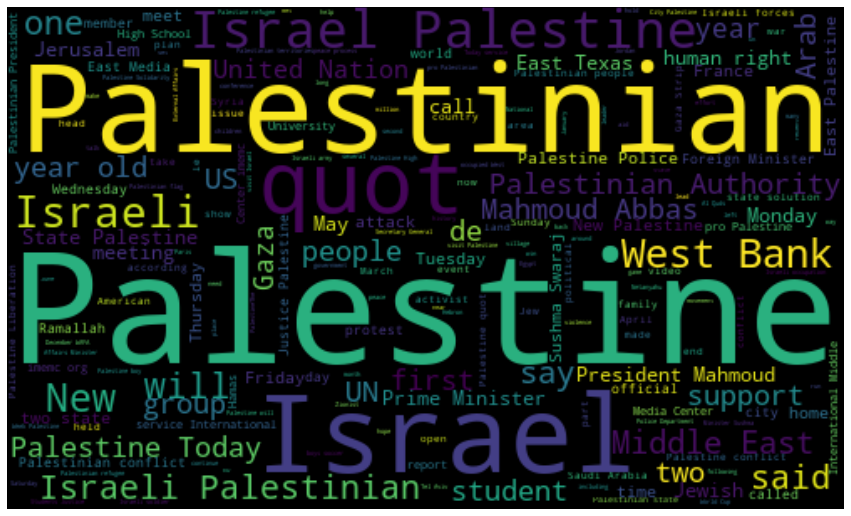

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['Topic']=='palestine']['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Popularity(Facebook)**

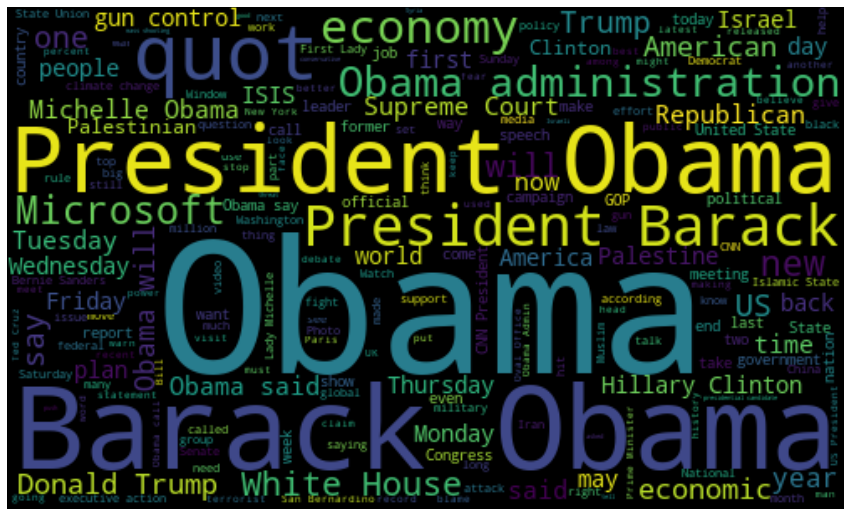

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['Facebook']>=200]['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Popularity(LinkedIn)**

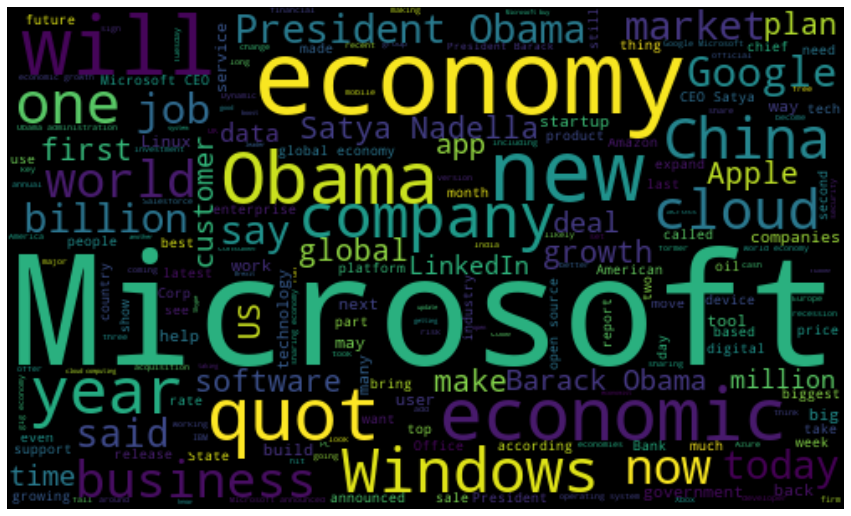

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['LinkedIn']>=200]['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**WordCloud based on Popularity(GooglePlus)**

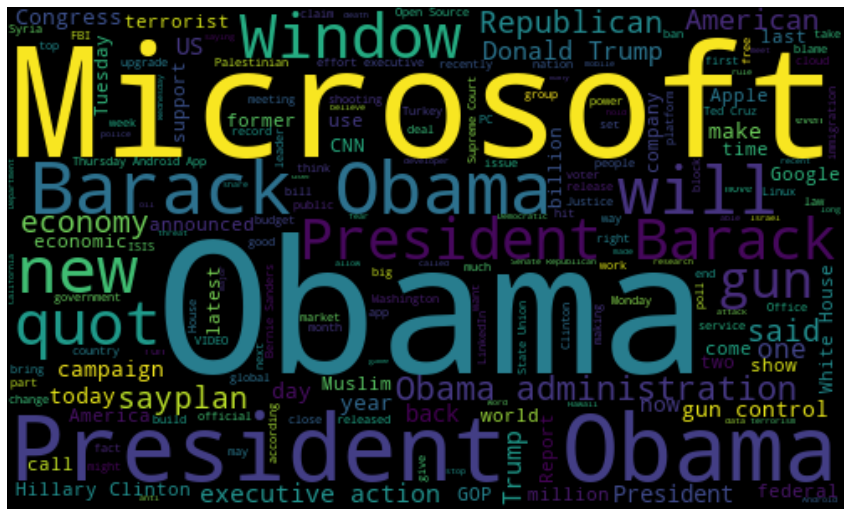

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['GooglePlus']>=100]['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Text Process Using NLTK**

In [ ]:
def Change_text(msg):
  punc=[char for char in msg if char not in punctuation]
  no_punc=''.join(punc)
  main_text=[word for word in no_punc.split() if word.lower() not in stopwords.words('english') and len(word) >3]
  return ' '.join(main_text)

In [ ]:
news_df['token_text']=news_df['Text'].apply(Change_text)

**A function Which Gives Result of diffrent metrics**

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2 score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

# **Base Line Model (Linear Regression)**

# **On Linkedin**

In [ ]:
X=news_df['token_text']
Y=news_df['LinkedIn']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [ ]:
test_pred_text=pipe_title.predict(X_test)

In [ ]:
print_metrics(Y_test,test_pred_text)

MSE is 29149.577414493466
RMSE is 170.73247322783521
r2 score is -0.027885464104569158
MAE is 48.84907695539932
MAPE is inf


# **On Facebook** 

In [ ]:
X=news_df['token_text']
Y=news_df['Facebook']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
vector=TfidfVectorizer(max_df = 0.8,min_df = 8)

In [ ]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [ ]:
test_pred_text=pipe_title.predict(X_test)

In [ ]:
print_metrics(Y_test,test_pred_text)

MSE is 405118.11268599954
RMSE is 636.4888943932954
r2 score is -0.149650732379212
MAE is 265.5821492779075
MAPE is inf


# **On GooglePlus**

In [ ]:
X=news_df['token_text']
Y=news_df['GooglePlus']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [ ]:
test_pred_text=pipe_title.predict(X_test)

In [ ]:
print_metrics(Y_test,test_pred_text)

MSE is 495.39768647323484
RMSE is 22.25753100577948
r2 score is -0.1386350988502787
MAE is 8.664402565122636
MAPE is inf


We could see that we have got some bad results that our model predicting a very bad r2 score.

We could do text processing with the spacy library let's see what kind of result we gonna get.



# **Text Process Using Spacy**

In [ ]:
nlp=spacy.load("en_core_web_sm")
nlp

In [ ]:
def spacy_tokenizer(sentence):
    res = re.sub(r"\s*[A-Z]\w*\s*", " ", sentence).strip()
    mytokens_nlp = nlp(res)
    entity=[str(i).lower() for i in mytokens_nlp.ents ]
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-"  else word.lower_ for word in mytokens_nlp]
    mytokens = [ word for word in mytokens if word not in STOP_WORDS and word not in punctuation and len(word)>=3 and word not in entity]
    return ' '.join(mytokens)

In [ ]:
news_df['Spacy_token']=news_df['Text'].apply(spacy_tokenizer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', min_df =100, max_df = 1.0)


In [ ]:
df1 = pd.DataFrame(X.todense() , columns=vectorizer.get_feature_names())

In [ ]:
df1.head(25)

2015  2016  access  accord  ...     worry  write      year     young
0    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
1    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
2    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
3    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.088325  0.000000
4    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
5    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
6    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
7    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
8    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
9    0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.124745  0.000000
10   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
11   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
12   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
13   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
14   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.249345  0.000000
15   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
16   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
17   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
18   0.0   0.0     0.0     0.0  ...  0.340848    0.0  0.168808  0.000000
19   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.192465  0.000000
20   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
21   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
22   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.154637  0.000000
23   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.000000
24   0.0   0.0     0.0     0.0  ...  0.000000    0.0  0.000000  0.437957

[25 rows x 545 columns]

Adding Sentiment to dataset

In [ ]:
df1['SentimentTitle'] = text_df['SentimentTitle']
df1['SentimentHeadline'] = text_df['SentimentHeadline']
df1['Facebook'] = text_df['Facebook']

In [ ]:
X = df1.drop(['Facebook'],axis = 1)
y = df1['Facebook']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# **Applying IQR for better prediction**

In [ ]:
percentile_q1 = np.percentile(df1['Facebook'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df1['Facebook'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df1['Facebook'],75)
print(percentile_q3)

1.0
7.0
47.0


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
df1=df1[df1['Facebook']>lower_limit_outlier]
df1=df1[df1['Facebook']<upper_limit_outlier]

# **Applying Lasso**

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(lasso_regressor.score(X_train, y_train))
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

0.0
The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.0016064895321086237


In [ ]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 625635.833220876
Train RMSE : 790.9714490554486
Train R2 : 0.0
Train Adjusted R2 :  -0.030735393638619435


In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 609611.6935656159
Test RMSE : 780.7763402957443
Test R2 : -1.4032030394739436e-05
Test Adjusted R2 :  -0.13545330823729462


#Ridge

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
ridge_regressor.score(X_train, y_train)

0.01177798951322151

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.0016064895321086237


In [ ]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 618267.1009381049
Train RMSE : 786.2996254215723
Train R2 : 0.01177798951322151
Train Adjusted R2 :  -0.01859540298143747


In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 611651.8415680125
Test RMSE : 782.0817358614204
Test R2 : -0.003360714273122456
Test Adjusted R2 :  -0.13925325634043162


After Hyper Parameter Tuning we couldn't get any satisfactory result.

We try Random Forest for better prediction.

# **Random Forest**

In [ ]:
n_estimators = np.arange(40,150,20)
max_depth = np.arange(5,20,3)
min_samples_split = [20,30,50]
min_samples_leaf = [40,50,60]
bootstrap = [True]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True]
              }

print(random_grid)

{'n_estimators': array([ 40,  60,  80, 100, 120, 140]), 'max_depth': array([ 5,  8, 11, 14, 17]), 'min_samples_split': [20, 30, 50], 'min_samples_leaf': [40, 50, 60], 'bootstrap': [True]}


In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf,
                         param_grid=random_grid,
                         cv = 3,
                         verbose=2,
                         n_jobs = -1)

rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 15.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=60,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
random_forest=rf_random.best_estimator_

In [ ]:
y_preds=random_forest.predict(X_test)

In [ ]:

feature_scores = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)[0:30]

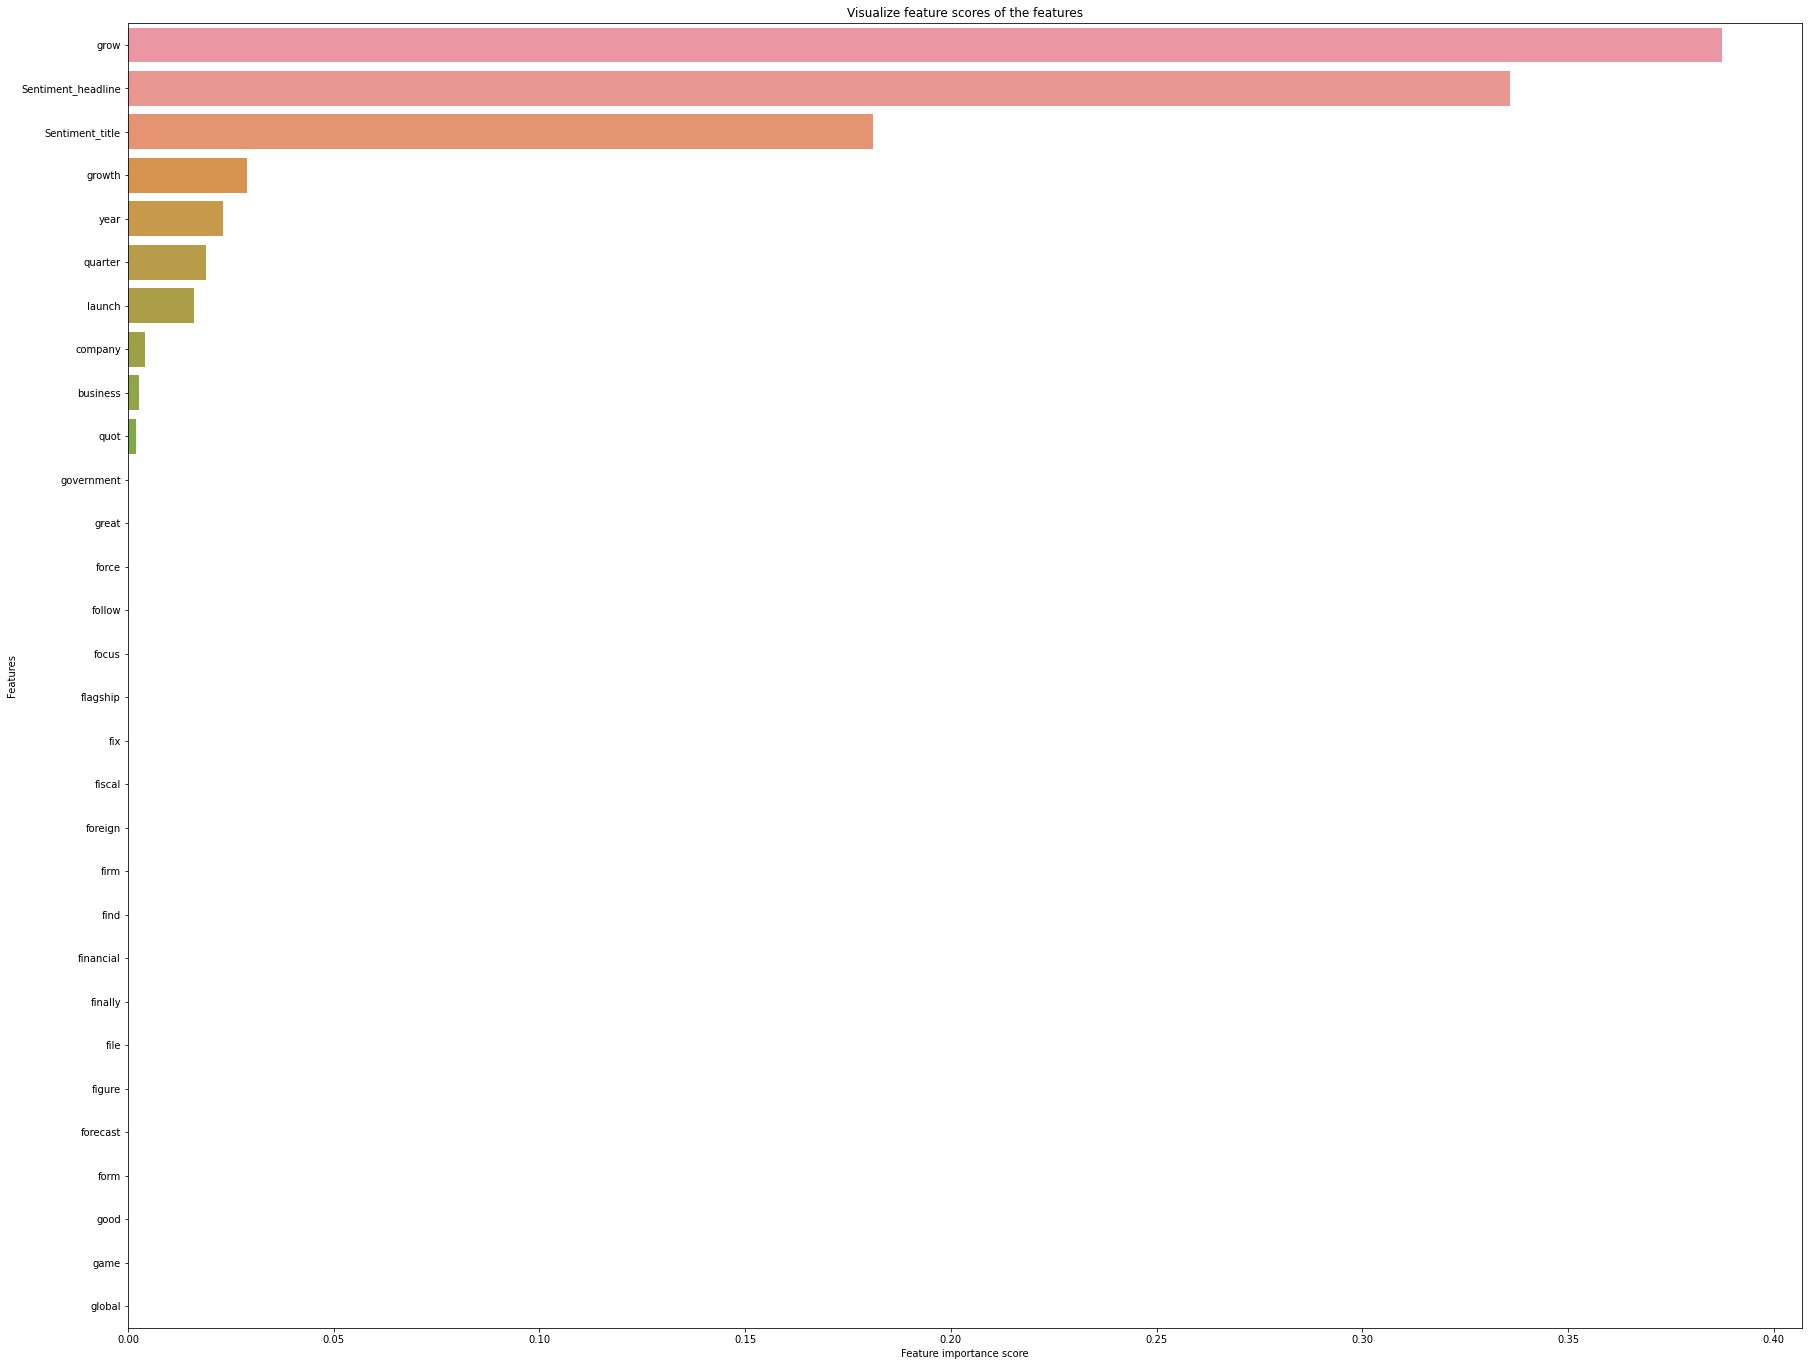

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
print_metrics(Y_test,y_preds)

MSE is 89.88818084279116
RMSE is 9.480937761782384
r2 score is -0.02974398003760581
MAE is 3.6521660383363383
MAPE is inf


We could see Random forest also not giving us good result. But in important feature we could see that. Sentiment analysis our most important feature also with growth and business.



#Decision tree


In [ ]:

# Maximum depth of trees
max_depth = [6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=20, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=20, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=20, total=   0.3s
[CV] max_depth=6, min_samples_leaf=10, min

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   58.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': 

In [ ]:
dt_grid.best_score_

-0.02597037491543506

In [ ]:
dt_grid.best_score_

-0.02597037491543506

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt_optimal_model =dt_grid.best_estimator_

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [ ]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 618516.5896939224
Train RMSE : 786.4582568031964
Train R2 : 0.011379213192285631
Train Adjusted R2 :  -0.01900643584957118


In [ ]:
MSE  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 620390.868027603
Test RMSE : 787.6489497406843
Test R2 : -0.017696313767220362
Test Adjusted R2 :  -0.15553043180974901


In [ ]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

Feature  Feature Importance
0               access                 0.0
1               accord                 0.0
2              account                 0.0
3                  act                 0.0
4               action                 0.0
..                 ...                 ...
540              write                 0.0
541               year                 0.0
542              young                 0.0
543     SentimentTitle                 0.2
544  SentimentHeadline                 0.0

[545 rows x 2 columns]

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
39               based                0.27
543     SentimentTitle                0.20
47             billion                0.12
324               pace                0.12
352          potential                0.11
..                 ...                 ...
177             figure                0.00
176              fight                0.00
175               feel                0.00
174            federal                0.00
544  SentimentHeadline                0.00

[545 rows x 2 columns]

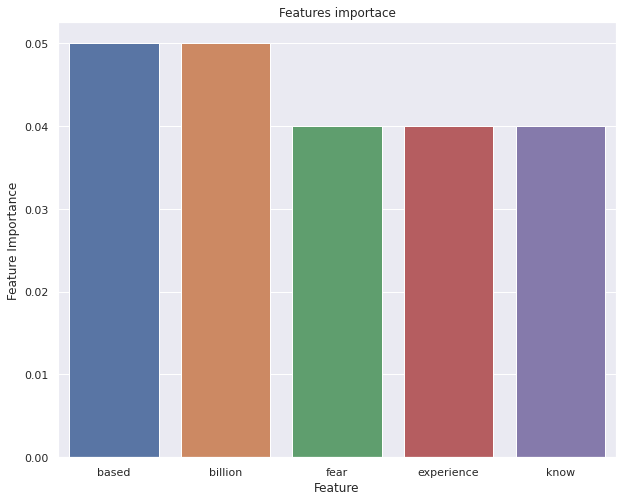

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:5])

#Visualize dt

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

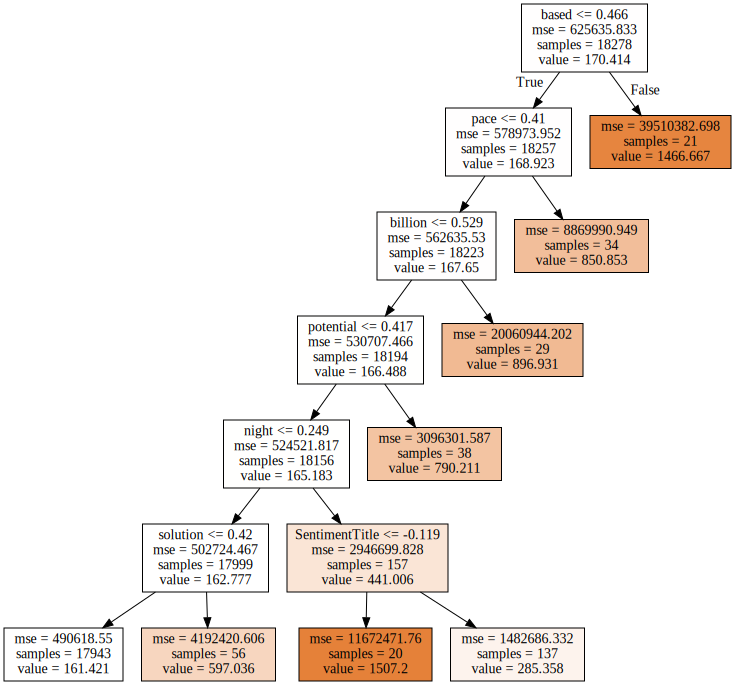

In [ ]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

#XGB

In [ ]:
# Number of trees
n_estimators = [40,80,100]

# Maximum depth of trees
max_depth = [7,9,10]
min_samples_split = [40,50]
#learning_rate=[0.1,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="neg_mean_squared_error",n_jobs = 2)

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done  54 out of  54 | elapsed: 17.0min finished


[12:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'max_depth': [7, 9, 10], 'min_samples_split': [40, 50],
                         'n_estimators': [40, 80, 100]

In [ ]:
xgb_grid.best_score_

-636303.6240825098

In [ ]:
xgb_grid.best_params_

{'max_depth': 7, 'min_samples_split': 40, 'n_estimators': 40}

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 464717.0938369495
Train RMSE : 681.7016164253606
Train R2 : 0.25720831646661035
Train Adjusted R2 :  0.2343783216817188


In [ ]:
MSE  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 624994.6951756302
Test RMSE : 790.5660599694564
Test R2 : -0.025248484760105327
Test Adjusted R2 :  -0.16410544902309177


In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

Feature  Feature Importance
0               access                0.00
1               accord                0.00
2              account                0.00
3                  act                0.00
4               action                0.00
..                 ...                 ...
540              write                0.00
541               year                0.01
542              young                0.00
543     SentimentTitle                0.00
544  SentimentHeadline                0.00

[545 rows x 2 columns]

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
39               based                0.05
47             billion                0.05
172               fear                0.04
161         experience                0.04
254               know                0.04
..                 ...                 ...
195               fund                0.00
194               fuel                0.00
193               free                0.00
192            foreign                0.00
544  SentimentHeadline                0.00

[545 rows x 2 columns]

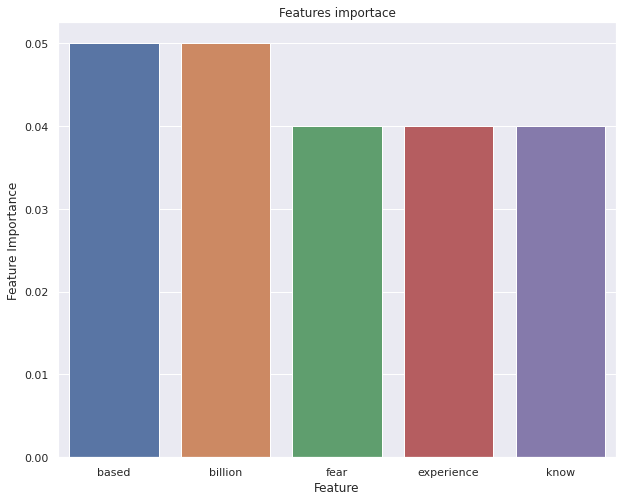

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:5])

We see that in DT and XGB our feature importance is same.But also we are un eable to improve r2 score.

# **Conclusion**

We could conclude that if sentiment value is highly positive then the popularity of that new is high same goes for low sentiment value.


If news contain certain kinds of words like growth, Fear, Danger, Government,business then our sentiment goes either positive or negative.

If we have more time we could do some better with prediction.
